In [1]:
import pandas as pd

In [3]:
!pip install kaggle

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gerhardien/iphone-transactions-indonesia-market")

print("Path to dataset files:", path)

100%|██████████| 5.11M/5.11M [00:00<00:00, 146MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gerhardien/iphone-transactions-indonesia-market/versions/2


In [5]:
import os
os.listdir(path)


['customers.csv',
 'transaction_details.csv',
 'products.csv',
 'transactions.csv']

In [6]:

customers = pd.read_csv(os.path.join(path, 'customers.csv'))
products = pd.read_csv(os.path.join(path, 'products.csv'))
transaction_details = pd.read_csv(os.path.join(path, 'transaction_details.csv'))
transactions = pd.read_csv(os.path.join(path, 'transactions.csv'))


In [8]:
print(customers)

       customer_id                        name                         email  \
0                1              Pranata Natsir    marsudimaryati@example.net   
1                2              Estiono Irawan           cagak03@example.net   
2                3              Yessi Yulianti     karimahhabibi@example.org   
3                4        drg. Bakti Kusmawati          ipertiwi@example.com   
4                5           Martani Sihombing         alazuardi@example.org   
...            ...                         ...                           ...   
49995        49996             Dr. Emas Namaga           rmansur@example.org   
49996        49997               Kayla Hidayat  rahimahdaniswara@example.org   
49997        49998         Gamanto Utami, M.M.    yolandamartaka@example.net   
49998        49999  Tgk. Banawa Yulianti, S.IP       utamigalang@example.org   
49999        50000                 Laswi Utama          cmulyani@example.com   

                                       

In [9]:
print(products)

    product_id         product_name    category  brand     price  \
0            1            iPhone 15  Smartphone  Apple  12000000   
1            2       iPhone 15 Plus  Smartphone  Apple  13000000   
2            3        iPhone 15 Pro  Smartphone  Apple  16000000   
3            4    iPhone 15 Pro Max  Smartphone  Apple  18000000   
4            5            iPhone 14  Smartphone  Apple  11000000   
5            6       iPhone 14 Plus  Smartphone  Apple  12000000   
6            7        iPhone 14 Pro  Smartphone  Apple  15000000   
7            8    iPhone 14 Pro Max  Smartphone  Apple  17000000   
8            9  iPhone SE (3rd Gen)  Smartphone  Apple   7000000   
9           10            iPhone 13  Smartphone  Apple  10000000   
10          11        iPhone 13 Pro  Smartphone  Apple  13000000   
11          12    iPhone 13 Pro Max  Smartphone  Apple  15000000   

                                          description  discount storage  \
0    Accusantium enim inventore optio eu

In [10]:
print(transactions)

       transaction_id  customer_id transaction_date  total_amount  \
0                   1          506       2023-07-22    11300000.0   
1                   2        23275       2024-07-01    11053000.0   
2                   3        24101       2022-11-01    12741000.0   
3                   4        24188       2022-02-04     4921000.0   
4                   5        33766       2022-02-06     2163000.0   
...               ...          ...              ...           ...   
99995           99996        23875       2024-04-19    14864000.0   
99996           99997        11779       2022-06-13     6675000.0   
99997           99998        30114       2022-12-03     1159000.0   
99998           99999        16749       2024-01-08    13041000.0   
99999          100000        31794       2022-07-10     2779000.0   

         payment_method shipping_method delivery_time   coupon_code  \
0      Cash on Delivery            Tiki      1 minggu  GRATISONGKIR   
1                  DANA      

In [11]:
print(transaction_details)

        transaction_id  product_id  quantity  unit_price  discount       total
0                25218          12         3     7000000        15  17850000.0
1                78866           9         1    15000000        15  12750000.0
2                71024           1         3    11000000        15  28050000.0
3                45980           6         4    12000000        15  40800000.0
4                35845           4         3    17000000        15  43350000.0
...                ...         ...       ...         ...       ...         ...
199995           35528           2         3    11000000        15  28050000.0
199996           49627           8         4     7000000        15  23800000.0
199997           18288           4         1    11000000        15   9350000.0
199998           52222           7         1    11000000        15   9350000.0
199999           72311           1         2     7000000         5  13300000.0

[200000 rows x 6 columns]


In [12]:
# Convert transaction_date to datetime
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

# Step 1: Merge transaction_details with products on product_id
merged_df = pd.merge(transaction_details, products, on='product_id', how='left')

# Step 2: Merge with transactions on transaction_id
merged_df = pd.merge(merged_df, transactions, on='transaction_id', how='left')

# Step 3: Merge with customers on customer_id
merged_df = pd.merge(merged_df, customers, on='customer_id', how='left')

# Step 4: Add 'Month' column for time-based analysis
merged_df['Month'] = merged_df['transaction_date'].dt.to_period('M')

# Preview the fully merged dataset
merged_df.head()


,transaction_id,product_id_x,quantity,unit_price,discount_x,total,product_name,category,brand,price,...,product_id_y,sales_factor_y,name,email,address,phone_number,age,city_y,preferred_product_id_y,Month
0,25218,12,3,7000000,15,17850000.0,iPhone 13 Pro Max,Smartphone,Apple,15000000,...,9,0.5,Kiandra Siregar,karimah18@example.org,"Gg. Raya Setiabudhi No. 9\nTomohon, DKI Jakart...",(077) 928 9866,25,Yogyakarta,2,2024-11
1,78866,9,1,15000000,15,12750000.0,iPhone SE (3rd Gen),Smartphone,Apple,7000000,...,9,0.5,Juli Zulkarnain,vimankuswandari@example.net,"Gang Ciwastra No. 4\nSamarinda, Bali 09408",0805987474,54,Jakarta,3,2023-06
2,71024,1,3,11000000,15,28050000.0,iPhone 15,Smartphone,Apple,12000000,...,12,0.7,Kamila Irawan,ulva13@example.org,"Gang Peta No. 903\nLangsa, Sulawesi Selatan 61524",+62 (600) 927-3394,45,Jakarta,9,2024-01
3,45980,6,4,12000000,15,40800000.0,iPhone 14 Plus,Smartphone,Apple,12000000,...,5,0.8,Wirda Kusumo,pbudiyanto@example.com,"Gg. Indragiri No. 9\nBogor, GO 12475",080 017 5769,23,Makassar,7,2024-05
4,35845,4,3,17000000,15,43350000.0,iPhone 15 Pro Max,Smartphone,Apple,18000000,...,12,0.7,Tgk. Yuni Suryono,pradiptarestu@example.com,"Gg. Dr. Djunjunan No. 825\nPekanbaru, MA 36264",+62 (0182) 876-2635,19,Yogyakarta,2,2024-09


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

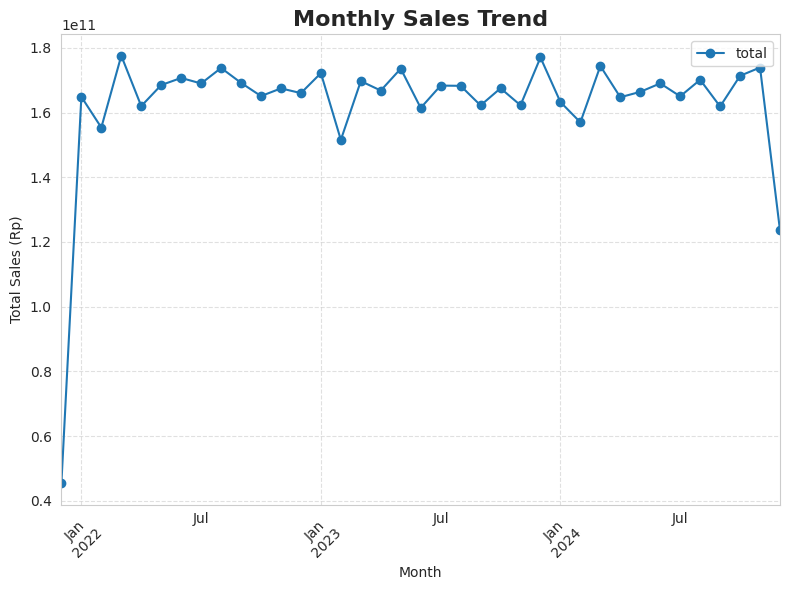

In [60]:
#Monthly Sales Trend
monthly_sales = merged_df.groupby('Month')['total'].sum()
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Total Sales (Rp)")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

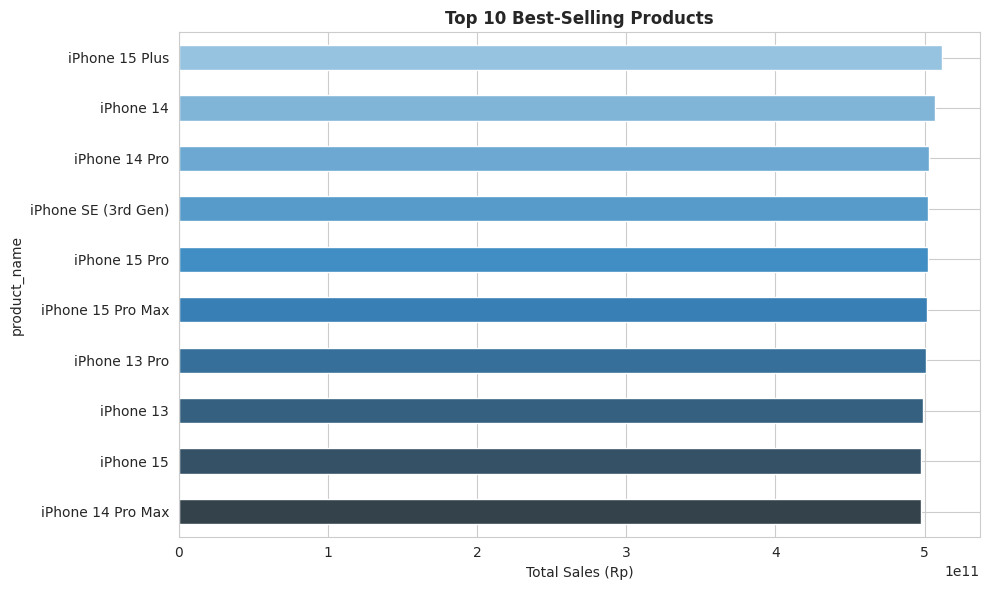

In [50]:
#Top 10 Best-Selling Products
top_products = merged_df.groupby('product_name')['total'].sum().sort_values(ascending=False).head(10)
sns.set_style("whitegrid")
colors = sns.color_palette("Blues_d", len(top_products))
plt.figure(figsize=(10,6))
top_products.plot(kind='barh', color=colors)
plt.title("Top 10 Best-Selling Products", fontsize=12, fontweight='bold')
plt.xlabel("Total Sales (Rp)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


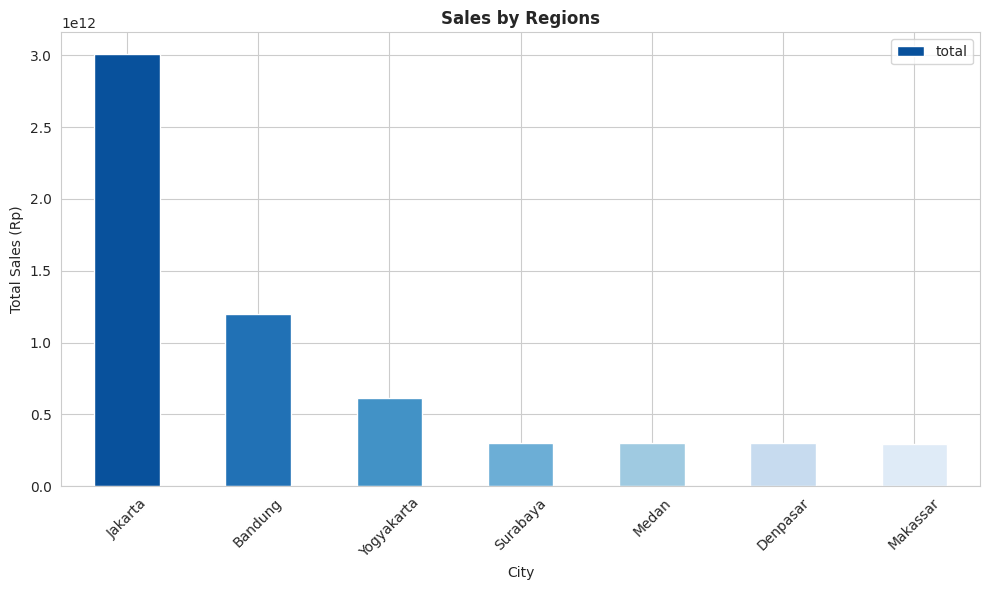

In [61]:
#Regional Sales
region_sales = merged_df.groupby('city_y')['total'].sum().sort_values(ascending=False)
sns.set_style("whitegrid")
colors = sns.color_palette("Blues_r", len(region_sales))  # Reverse blue scale for visual appeal

plt.figure(figsize=(10,6))
region_sales.plot(kind='bar', color=colors)
plt.title("Sales by Regions",fontsize=12,fontweight='bold')
plt.ylabel("Total Sales (Rp)")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


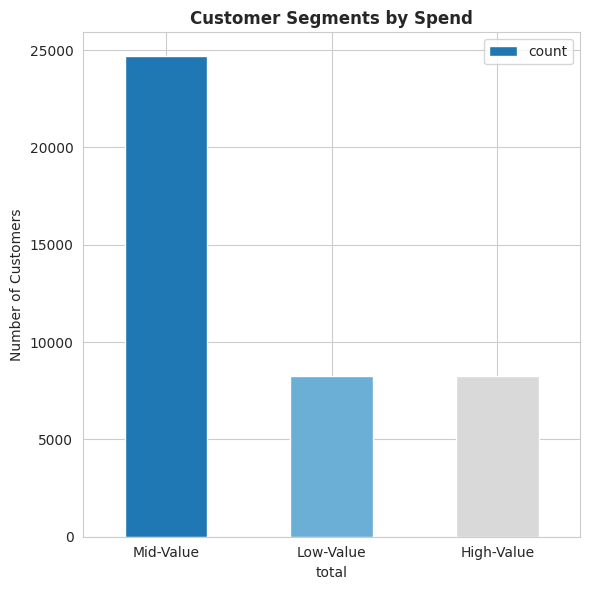

In [53]:
#Customer Segments by Spend
customer_spend = merged_df.groupby('customer_id')['total'].sum()
# Define segments (top 20%, mid 60%, bottom 20%)
high = customer_spend.quantile(0.80)
low = customer_spend.quantile(0.20)
segments = customer_spend.apply(
    lambda x: 'High-Value' if x >= high else ('Low-Value' if x <= low else 'Mid-Value')
)
sns.set_style("whitegrid")
colors = ['#1f77b4', '#6baed6', '#d9d9d9']
segment_counts = segments.value_counts()
plt.figure(figsize=(6,6))
segment_counts.plot(kind='bar', color=colors)
plt.title("Customer Segments by Spend",fontsize=12, fontweight='bold')
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.show()


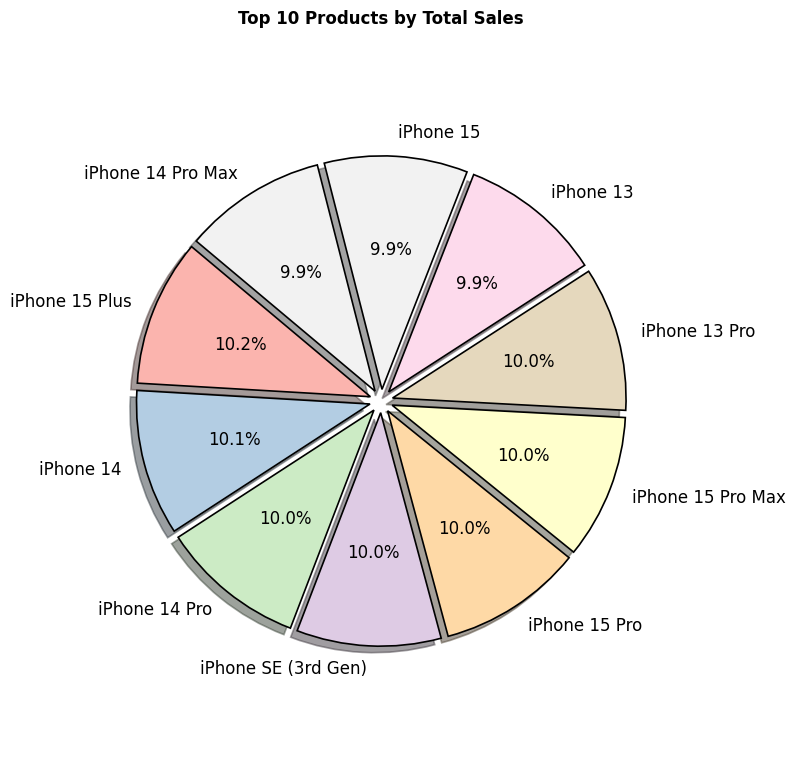

In [47]:
#Top 10 products by sales
top_products = merged_df.groupby('product_name')['total'].sum().sort_values(ascending=False).head(10)

# Aesthetic settings
colors = plt.cm.Pastel1(range(10))  # Use a pastel color palette
explode = [0.05] * 10               # Slight explode on all slices for style

# Plot
plt.figure(figsize=(8,8))
plt.pie(
    top_products,
    labels=top_products.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},  # Border around slices
    textprops={'fontsize': 12}
)

plt.title("Top 10 Products by Total Sales", fontsize=12, fontweight='bold')
plt.axis('equal')   # Keep the pie circular
plt.tight_layout()
plt.show()
